<a href="https://colab.research.google.com/github/Seb207/Market-Context-Project/blob/main/Setup_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data_Management

***Required Functions***

- SQL DB Connection, Managing
- Data conversion
- Data labeling
- Data I/O
- Current DB status

#Import Packages

In [1]:
import numpy as np
import pandas as pd
import psycopg2
from matplotlib import pyplot as plt

#SQL Connect & Setup

In [ ]:
!sudo apt-get -y -qq update
!sudo apt-get -y -qq install postgresql

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)


In [ ]:
!sudo service postgresql start

postgresql: unrecognized service


In [ ]:
con = psycopg2.connect()

OperationalError: connection to server on socket "/var/run/postgresql/.s.PGSQL.5432" failed: No such file or directory
	Is the server running locally and accepting connections on that socket?


#Refinitiv Excel Data Import Test

In [5]:
NDX_D = pd.read_excel('/content/drive/MyDrive/코딩 프로젝트/Quant Program/Market_Context_Model/Data/Price History_NDX_2Y_D.xlsx', header=32, index_col=0, usecols='A,B,C,D,E,F,G,H')

In [6]:
NDX_D.head()

,Close,Net,%Chg,Open,Low,High,Volume
Exchange Date,,,,,,,
2025-07-25,23272.246,52.381,0.002256,23204.664,23193.991,23326.297,324941864
2025-07-24,23219.865,57.459,0.002481,23228.789,23150.267,23268.492,348237961
2025-07-23,23162.406,98.828,0.004285,23100.251,23000.459,23168.493,332209560
2025-07-22,23063.578,-116.484,-0.005025,23182.023,22953.850,23186.363,309160356
2025-07-21,23180.062,114.588,0.004968,23124.967,23122.934,23264.451,266396552


In [7]:
NDX_D.dropna()

,Close,Net,%Chg,Open,Low,High,Volume
Exchange Date,,,,,,,
2025-07-25,23272.246,52.381,0.002256,23204.664,23193.991,23326.297,324941864
2025-07-24,23219.865,57.459,0.002481,23228.789,23150.267,23268.492,348237961
2025-07-23,23162.406,98.828,0.004285,23100.251,23000.459,23168.493,332209560
2025-07-22,23063.578,-116.484,-0.005025,23182.023,22953.850,23186.363,309160356
2025-07-21,23180.062,114.588,0.004968,23124.967,23122.934,23264.451,266396552
...,...,...,...,...,...,...,...
2023-08-04,15274.915,-78.626,-0.005121,15420.739,15258.686,15523.314,285538412
2023-08-03,15353.541,-17.198,-0.001119,15287.773,15270.722,15436.591,246161240
2023-08-02,15370.739,-347.270,-0.022094,15561.148,15321.437,15561.357,305948970


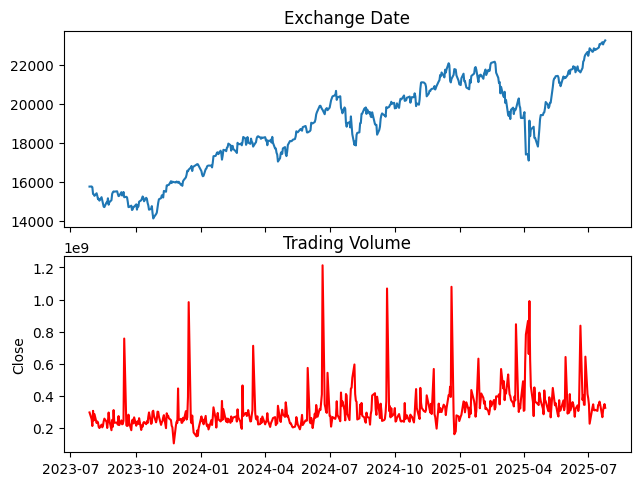

In [46]:
NDX_date = NDX_D.index
NDX_close = NDX_D['Close']
NDX_volume = NDX_D['Volume']

fig, ax = plt.subplots(2, 1, sharex=True)
#fig.subplots_adjust(hspace=1)
fig.tight_layout()

ax[0].plot(NDX_date, NDX_close)
ax[0].set_title('Exchange Date')
ax[1].plot(NDX_date, NDX_volume, 'r-')
ax[1].set_title('Trading Volume')
plt.ylabel('Close')
plt.show()

#Refinitiv API Setup

#Data Import and Graph Test

In [34]:
GLD_D = pd.read_excel('/content/drive/MyDrive/코딩 프로젝트/Quant Program/Market_Context_Model/Data/GLD_2Y_D.xlsx', header=30, index_col=0, usecols='A,B,D,E,F,G,H,I')

In [35]:
GLD_D.head()

,Close,Net,%Chg,Open,Low,High,Volume
Exchange Date,,,,,,,
2025-07-28,304.833183,-2.566817,-0.008350,306.44,304.05,306.58,4159289.0
2025-07-25,307.400000,-2.870000,-0.009250,307.82,306.20,308.31,9376386.0
2025-07-24,310.270000,-1.910000,-0.006118,309.29,309.06,310.99,7698763.0
2025-07-23,312.180000,-3.920000,-0.012401,314.00,311.42,314.96,10547520.0
2025-07-22,316.100000,2.970000,0.009485,314.48,313.62,316.24,13691849.0


In [37]:
GLD_D = GLD_D.drop(['2025-07-28', '2023-07-28'], axis=0).dropna()

In [38]:
GLD_D.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 499 entries, 2025-07-25 to 2023-07-31
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   499 non-null    float64
 1   Net     499 non-null    float64
 2   %Chg    499 non-null    float64
 3   Open    499 non-null    float64
 4   Low     499 non-null    float64
 5   High    499 non-null    float64
 6   Volume  499 non-null    float64
dtypes: float64(7)
memory usage: 31.2 KB


In [67]:
GLD_date = GLD_D.index
GLD_close = GLD_D['Close']
GLD_volume = GLD_D['Volume']

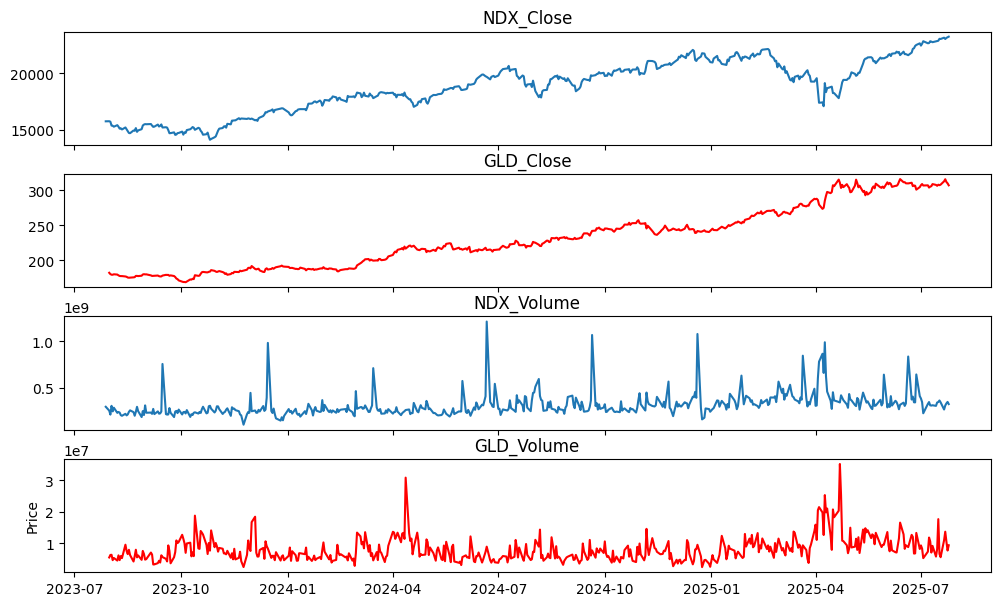

In [94]:
fig, (ax0, ax1, ax2, ax3) = plt.subplots(4, 1, sharex=True, figsize=(10,6))
fig.tight_layout()

ax0.plot(NDX_date, NDX_close)
ax0.set_title('NDX_Close')
ax1.plot(GLD_date, GLD_close, 'r-')
ax1.set_title('GLD_Close')
ax2.plot(NDX_date, NDX_volume)
ax2.set_title('NDX_Volume')
ax3.plot(GLD_date, GLD_volume, 'r-')
ax3.set_title('GLD_Volume')
plt.ylabel('Price')

plt.show()

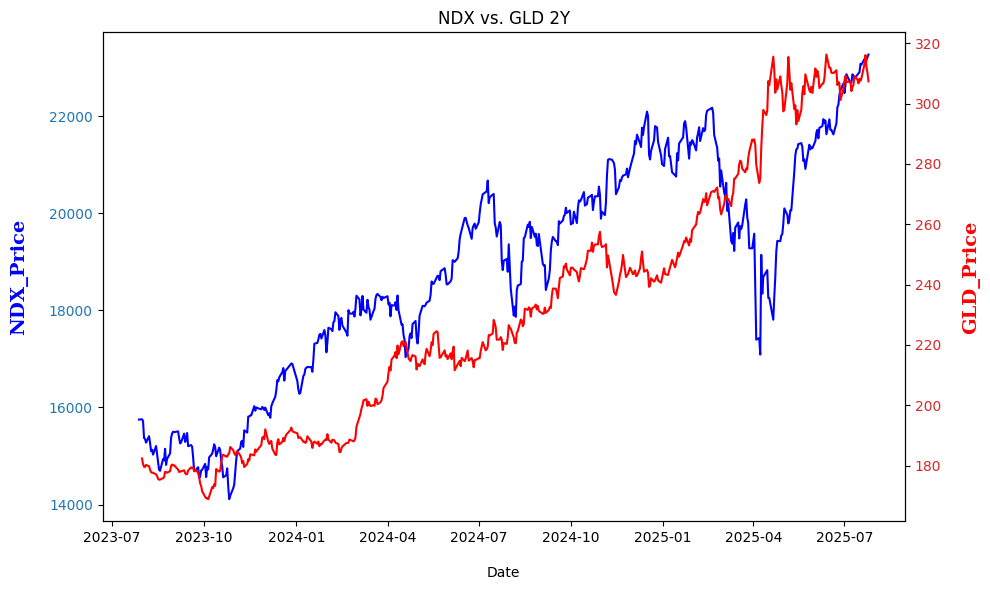

In [101]:
fig, ax1 = plt.subplots()

font1 = {'family': 'serif',
         'color': 'b',
         'weight': 'bold',
         'size': 14
         }

font2 = {'family': 'serif',
         'color': 'r',
         'weight': 'bold',
         'size': 14
         }

ax1.set_title('NDX vs. GLD 2Y')
ax1.set_ylabel('NDX_Price', fontdict=font1, labelpad=15)
ax1.set_xlabel('Date', labelpad=15)
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.plot(NDX_date, NDX_close, 'b')

ax2 = ax1.twinx()
ax2.set_ylabel('GLD_Price', fontdict=font2, labelpad=15)
ax2.tick_params(axis='y', labelcolor='tab:red')
ax2.plot(GLD_date, GLD_close, 'r')

fig.tight_layout()
plt.show()

#Yfinance Library Test